In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [ ]:
def plot_results(mod_history, metric, epochs):

      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [ ]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()

In [ ]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

In [ ]:
path = "/content/drive/MyDrive/faceshape_women/data"

X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (4000, 224, 224, 1)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, activation='softmax'))

# Compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Summary model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 64)       

In [ ]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
125/125 [==============================] - 4s 17ms/step - loss: 1.6112 - accuracy: 0.1982 - val_loss: 1.6072 - val_accuracy: 0.2000
Epoch 2/150
125/125 [==============================] - 1s 11ms/step - loss: 1.6070 - accuracy: 0.2270 - val_loss: 1.6003 - val_accuracy: 0.2540
Epoch 3/150
125/125 [==============================] - 1s 11ms/step - loss: 1.5902 - accuracy: 0.2623 - val_loss: 1.5527 - val_accuracy: 0.3120
Epoch 4/150
125/125 [==============================] - 1s 11ms/step - loss: 1.5613 - accuracy: 0.2862 - val_loss: 1.5357 - val_accuracy: 0.2990
Epoch 5/150
125/125 [==============================] - 1s 11ms/step - loss: 1.5304 - accuracy: 0.2965 - val_loss: 1.5370 - val_accuracy: 0.3130
Epoch 6/150
125/125 [==============================] - 1s 11ms/step - loss: 1.5074 - accuracy: 0.3180 - val_loss: 1.5103 - val_accuracy: 0.3240
Epoch 7/150
125/125 [==============================] - 1s 11ms/step - loss: 1.4911 - accuracy: 0.3325 - val_loss: 1.4838 - val_accuracy:

In [ ]:
max(history_2.history['val_accuracy'])

0.43700000643730164

In [ ]:
model_2.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 3.5611 - accuracy: 0.4150


[3.5611112117767334, 0.41499999165534973]

20/20 [==============================] - 0s 6ms/step
Normalized confusion matrix
[[0.35  0.145 0.315 0.12  0.07 ]
 [0.24  0.385 0.23  0.09  0.055]
 [0.195 0.13  0.365 0.215 0.095]
 [0.075 0.045 0.22  0.485 0.175]
 [0.065 0.045 0.24  0.16  0.49 ]]


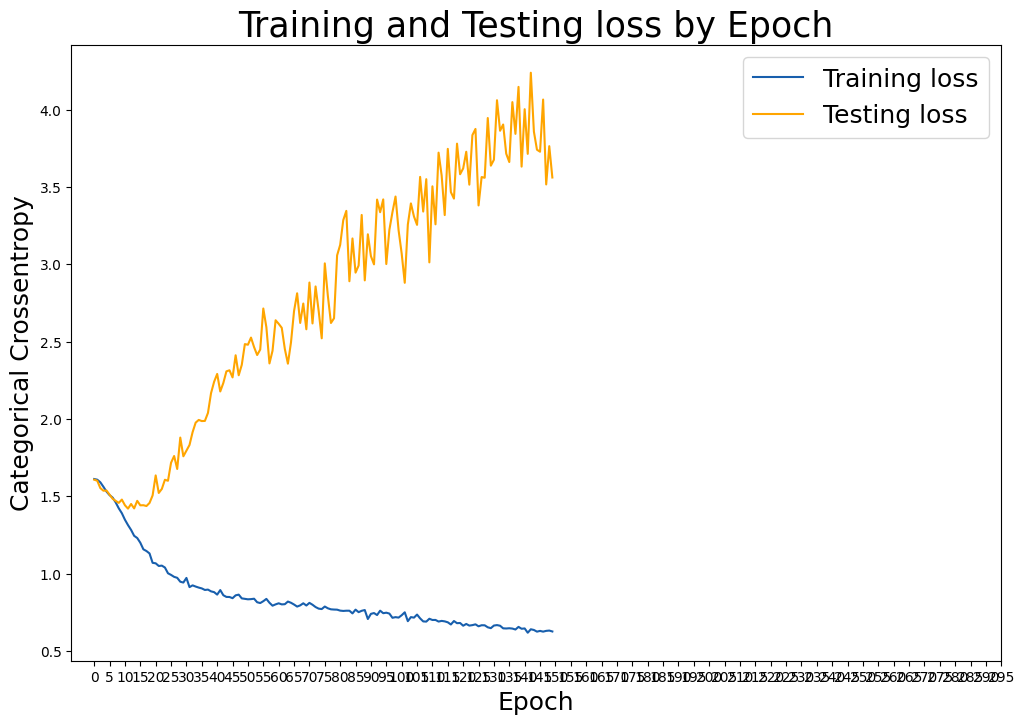

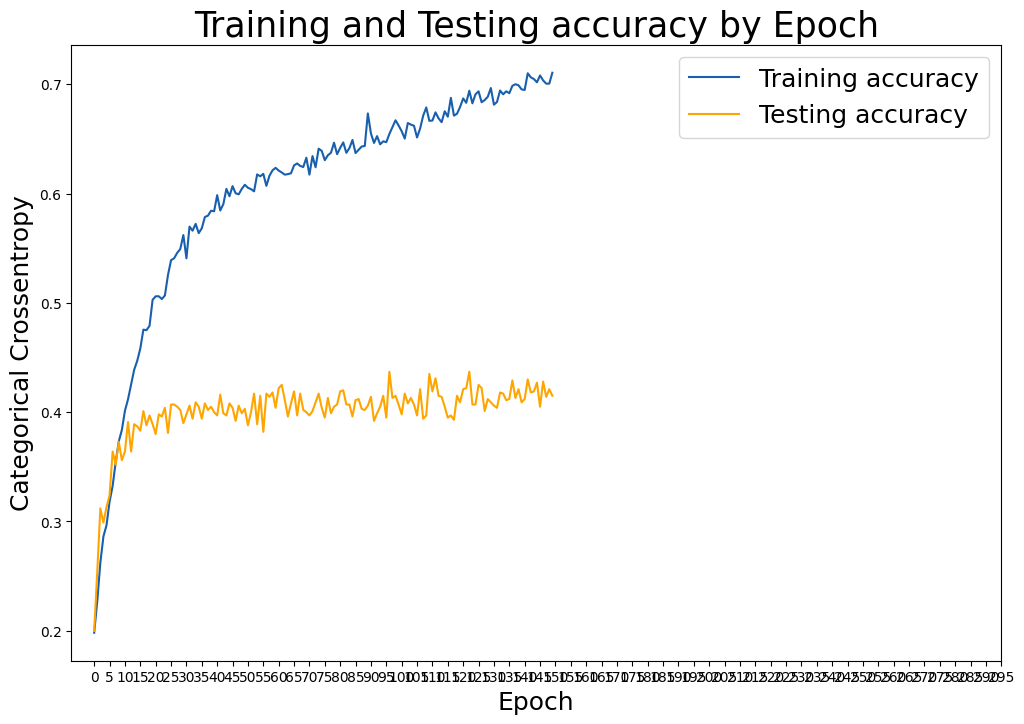

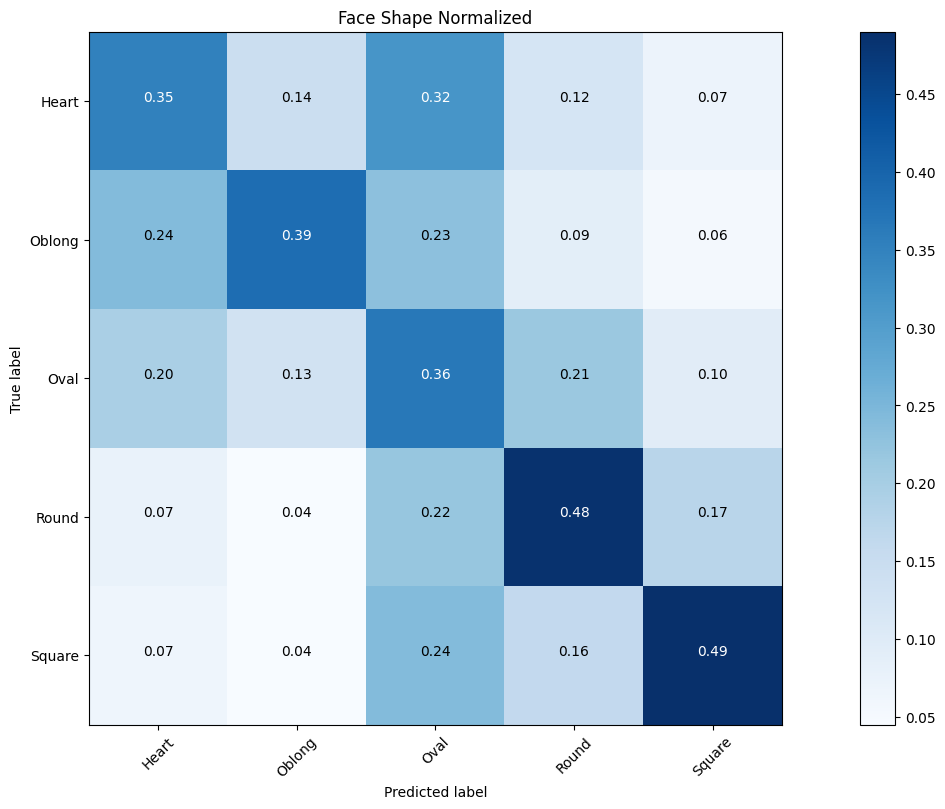

In [ ]:
plot_summary_results(model_2, history_2, 300)

In [ ]:
model_path = '/content/drive/MyDrive/faceshape_women/saved_model/extra'
tf.keras.models.save_model(
    model_2, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'crop'
model_2.save(filename)

In [ ]:
path = "/content/drive/MyDrive/faceshape_women/data"

X_train = np.asarray(pickle.load(open(path + "X_train_gray.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_gray.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_gray.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_gray.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (4000, 224, 224, 1)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 16,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 32,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_3.add(Dropout(0.5))  ##added
model_3.add(Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 64)       

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0,
                           patience=5, mode='auto')

In [ ]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test))

Epoch 1/250
125/125 [==============================] - 4s 17ms/step - loss: 1.6107 - accuracy: 0.1925 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 2/250
125/125 [==============================] - 1s 11ms/step - loss: 1.6094 - accuracy: 0.2002 - val_loss: 1.6049 - val_accuracy: 0.2740
Epoch 3/250
125/125 [==============================] - 1s 11ms/step - loss: 1.5973 - accuracy: 0.2377 - val_loss: 1.5818 - val_accuracy: 0.2780
Epoch 4/250
125/125 [==============================] - 1s 11ms/step - loss: 1.5483 - accuracy: 0.2948 - val_loss: 1.4655 - val_accuracy: 0.3730
Epoch 5/250
125/125 [==============================] - 1s 11ms/step - loss: 1.4653 - accuracy: 0.3520 - val_loss: 1.3689 - val_accuracy: 0.3890
Epoch 6/250
125/125 [==============================] - 1s 11ms/step - loss: 1.3664 - accuracy: 0.4005 - val_loss: 1.2666 - val_accuracy: 0.5010
Epoch 7/250
125/125 [==============================] - 1s 11ms/step - loss: 1.3008 - accuracy: 0.4358 - val_loss: 1.1930 - val_accuracy:

In [ ]:
max(history_3.history['val_accuracy']) #epoch 240/250, accuracy 0.8320

0.7009999752044678

In [ ]:
model_3.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 2.2464 - accuracy: 0.6690


[2.246384382247925, 0.6690000295639038]

20/20 [==============================] - 0s 6ms/step
Normalized confusion matrix
[[0.625 0.08  0.135 0.13  0.03 ]
 [0.09  0.795 0.08  0.01  0.025]
 [0.15  0.105 0.53  0.15  0.065]
 [0.07  0.015 0.1   0.73  0.085]
 [0.055 0.02  0.09  0.17  0.665]]


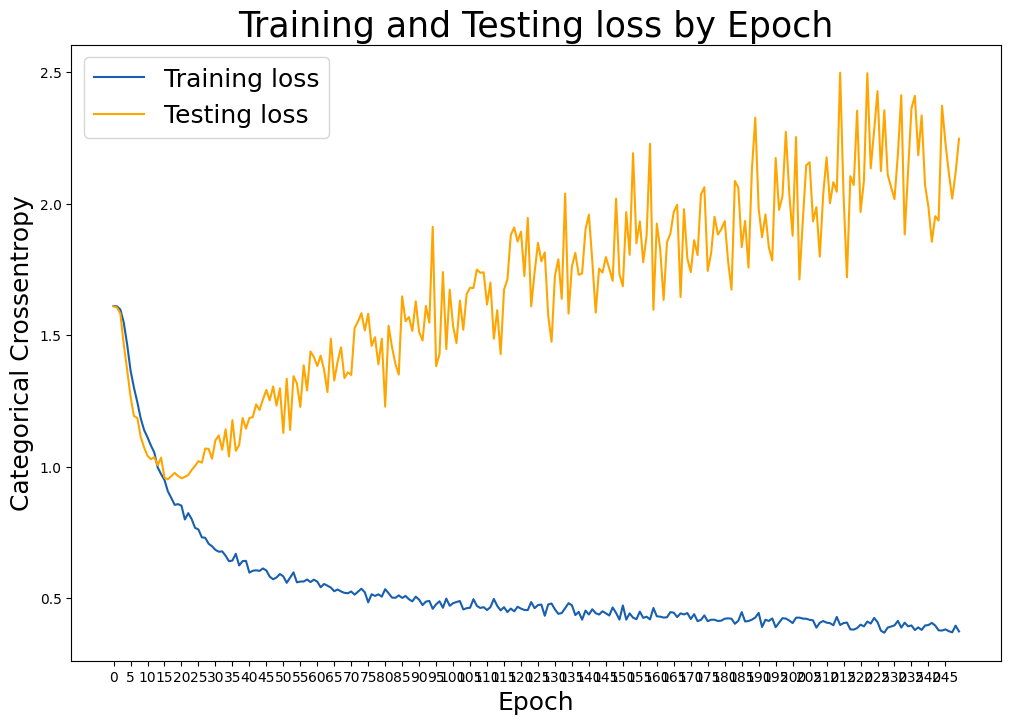

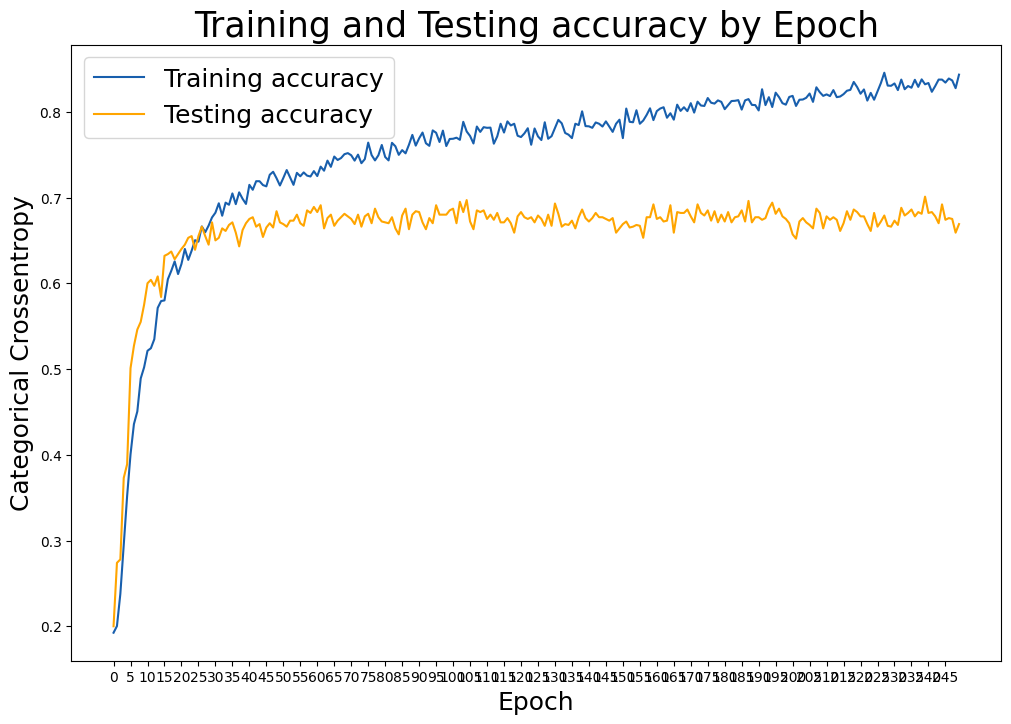

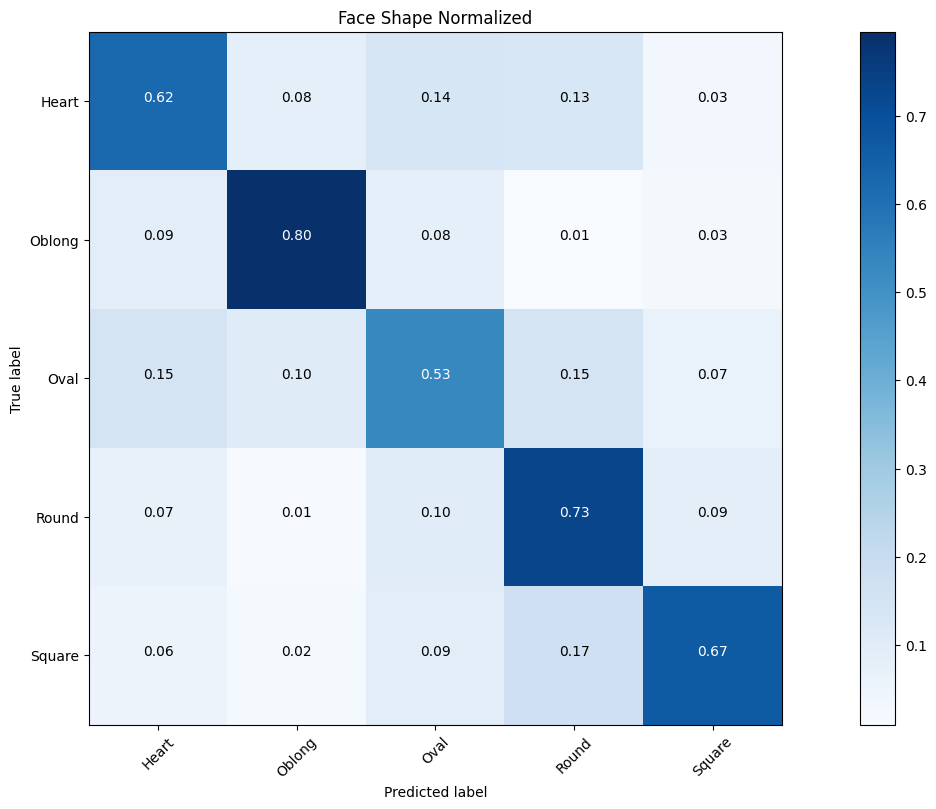

In [ ]:
plot_summary_results(model_3, history_3, 250)

In [ ]:
model_path = '/content/drive/MyDrive/faceshape_women/saved_model/extra'
tf.keras.models.save_model(
    model_3, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'gray'
model_3.save(filename)

In [ ]:
path = "/content/drive/MyDrive/faceshape_women/data"

X_train = np.asarray(pickle.load(open(path + "X_train_rgb.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_rgb.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_rgb.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_rgb.pickle","rb")))

In [ ]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (4000, 224, 224, 3)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [ ]:
# Definisi model
model_4 = Sequential()
model_4.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_4.add(Dropout(0.5))  ##added
model_4.add(Dense(5, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 64)        9280      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 26, 26, 64)       

In [ ]:
history_4 = model_4.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test)) #,
                        #callbacks=[early_stop])

Epoch 1/250
125/125 [==============================] - 6s 32ms/step - loss: 1.5984 - accuracy: 0.2390 - val_loss: 1.5566 - val_accuracy: 0.3030
Epoch 2/250
125/125 [==============================] - 2s 16ms/step - loss: 1.5131 - accuracy: 0.3040 - val_loss: 1.4109 - val_accuracy: 0.3940
Epoch 3/250
125/125 [==============================] - 2s 16ms/step - loss: 1.4013 - accuracy: 0.3918 - val_loss: 1.3305 - val_accuracy: 0.4860
Epoch 4/250
125/125 [==============================] - 2s 16ms/step - loss: 1.3166 - accuracy: 0.4435 - val_loss: 1.2739 - val_accuracy: 0.4850
Epoch 5/250
125/125 [==============================] - 2s 16ms/step - loss: 1.2524 - accuracy: 0.4710 - val_loss: 1.1912 - val_accuracy: 0.5350
Epoch 6/250
125/125 [==============================] - 2s 16ms/step - loss: 1.1853 - accuracy: 0.4933 - val_loss: 1.1758 - val_accuracy: 0.5520
Epoch 7/250
125/125 [==============================] - 2s 17ms/step - loss: 1.1269 - accuracy: 0.5288 - val_loss: 1.1233 - val_accuracy:

In [ ]:
max(history_4.history['val_accuracy']) #epoch 181/250, accuracy 0.8802

0.7129999995231628

In [ ]:
model_4.evaluate(X_test, y_test)

32/32 [==============================] - 0s 10ms/step - loss: 2.8604 - accuracy: 0.6930


[2.8603932857513428, 0.6930000185966492]

20/20 [==============================] - 0s 14ms/step
Normalized confusion matrix
[[0.47  0.165 0.13  0.145 0.09 ]
 [0.065 0.845 0.06  0.    0.03 ]
 [0.175 0.17  0.395 0.12  0.14 ]
 [0.07  0.03  0.1   0.635 0.165]
 [0.025 0.065 0.045 0.145 0.72 ]]


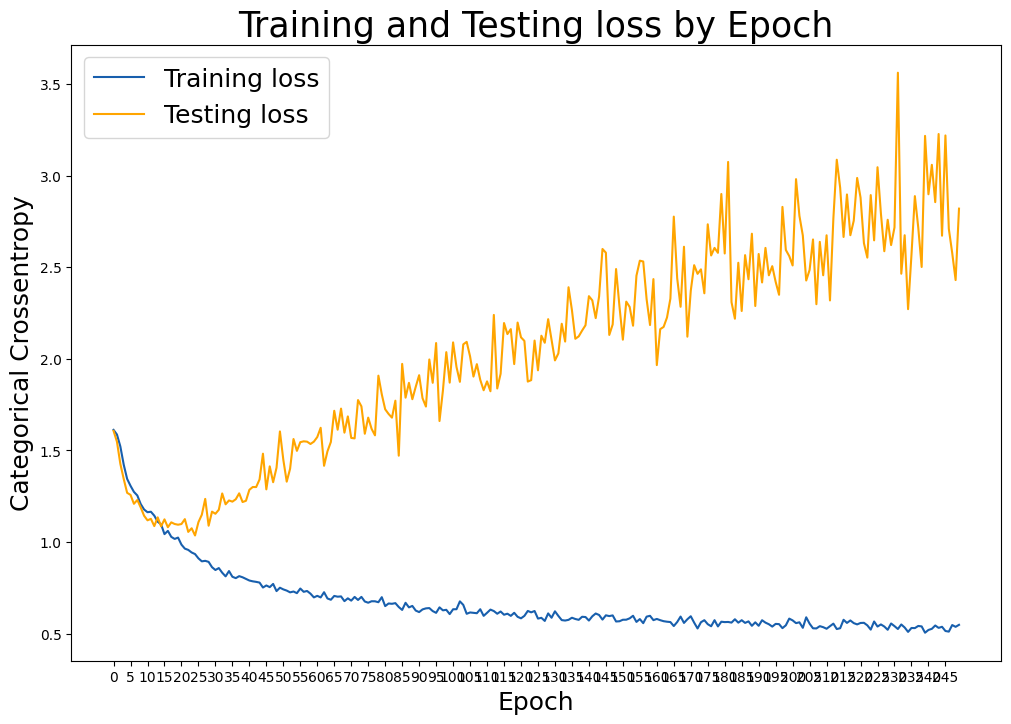

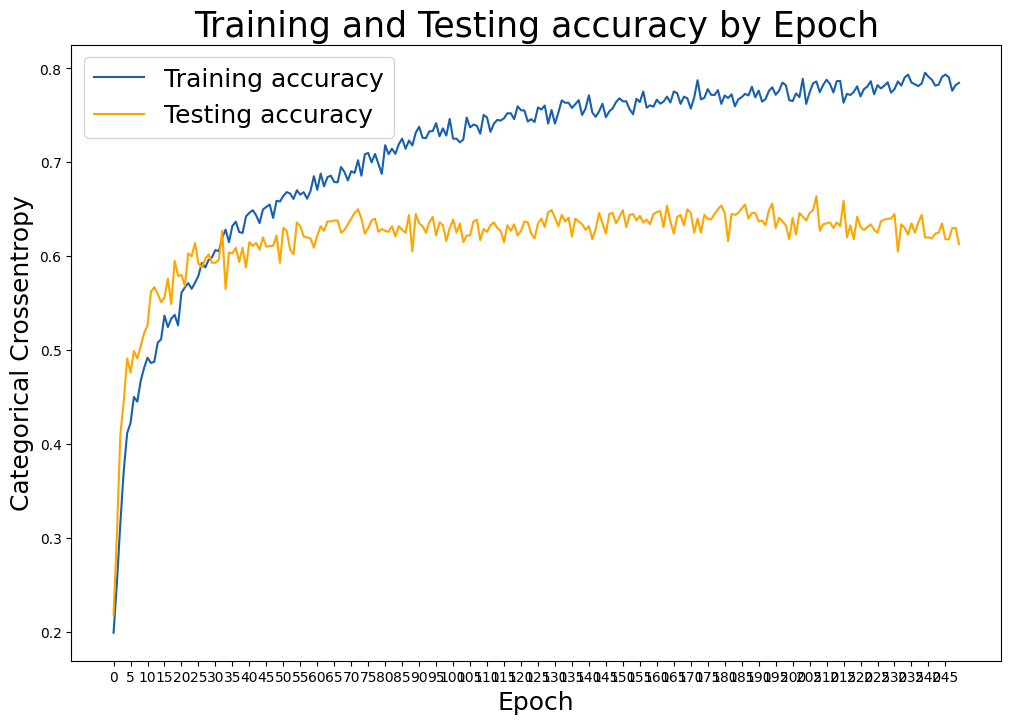

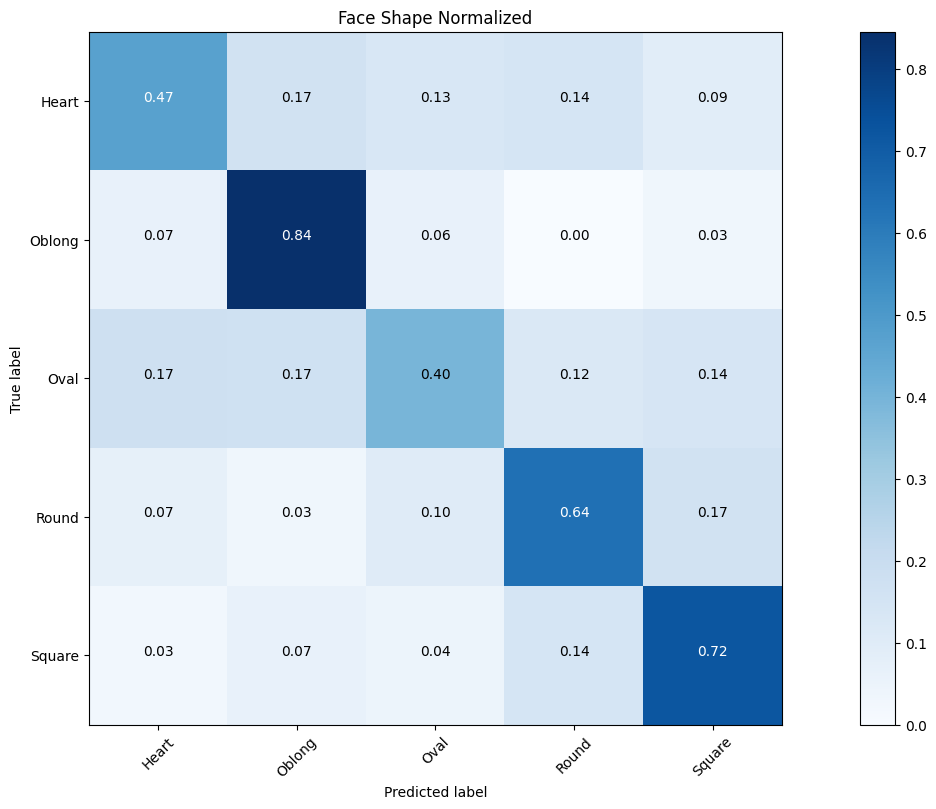

In [ ]:
plot_summary_results(model_4, history_4, 250)

In [ ]:
model_path = '/content/drive/MyDrive/faceshape_women/saved_model/extra'
tf.keras.models.save_model(
    model_4, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None)

filename = model_path + 'rgb'
model_4.save(filename)

In [ ]:
loaded_model = tf.keras.models.load_model(filename)

# Compare the predictions from the model_4 vs. the saved version of model_4
mod4_predict = model_4.predict(X_test)
loaded4_predict = loaded_model.predict(X_test)

32/32 [==============================] - 0s 9ms/step


In [ ]:
print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded4_predict - mod4_predict)}')

Difference in predictions: Saved model vs. original model is 0.0
